In [155]:
print("hello world");

hello world


In [156]:
pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

importing the libraries


In [158]:
import numpy as np
import pandas as pd

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

loading the dataset

In [161]:
df=sns.load_dataset("mpg")

In [162]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [164]:
df.drop(["name"],axis=1,inplace=True)

In [165]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


**summary of data**

In [167]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**data prepocessing**

In [169]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [170]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [171]:
df.dropna(inplace =True)

In [172]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [173]:
df.shape


(392, 8)

**univariate analysis: getting characterstics of individual columns**


In [175]:
df["cylinders"].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [176]:
df["cylinders"].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

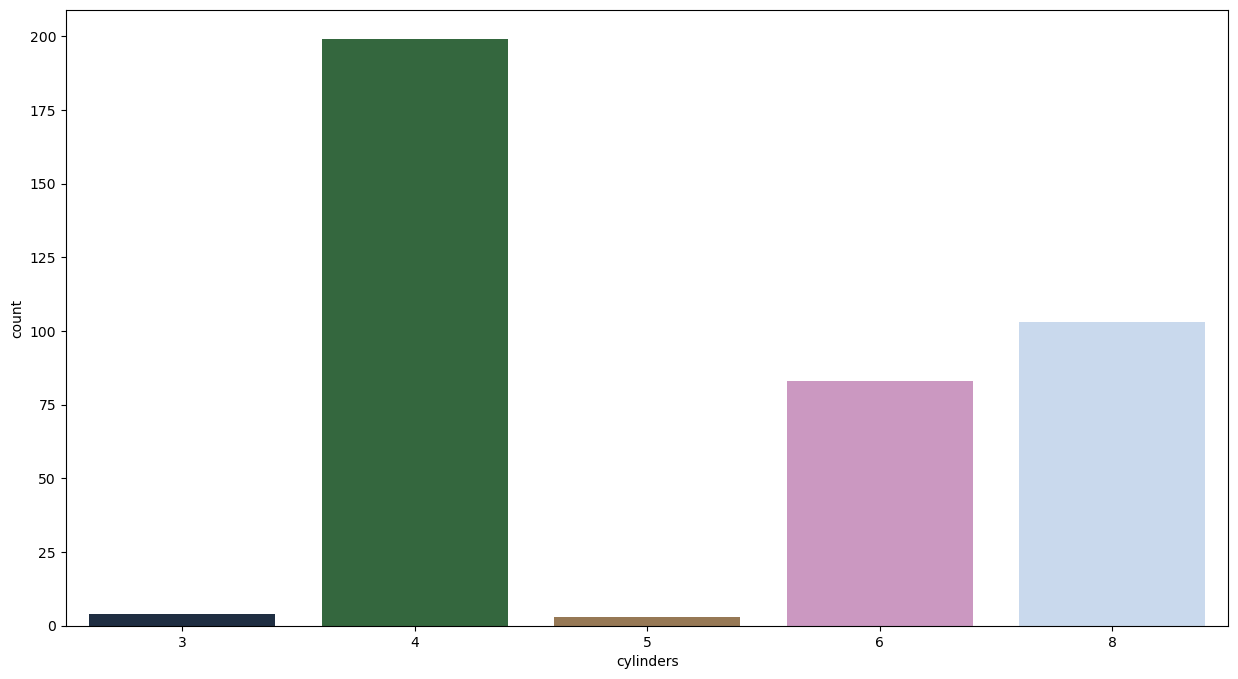

In [177]:
plt.figure(figsize = (15, 8))
sns.countplot(x=df["cylinders"], data = df, palette = "cubehelix")
plt.show()

In [178]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


changing model year from 70 to 1970 for better understanding

In [180]:
df["model_year"]=df["model_year"]+1900

In [181]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


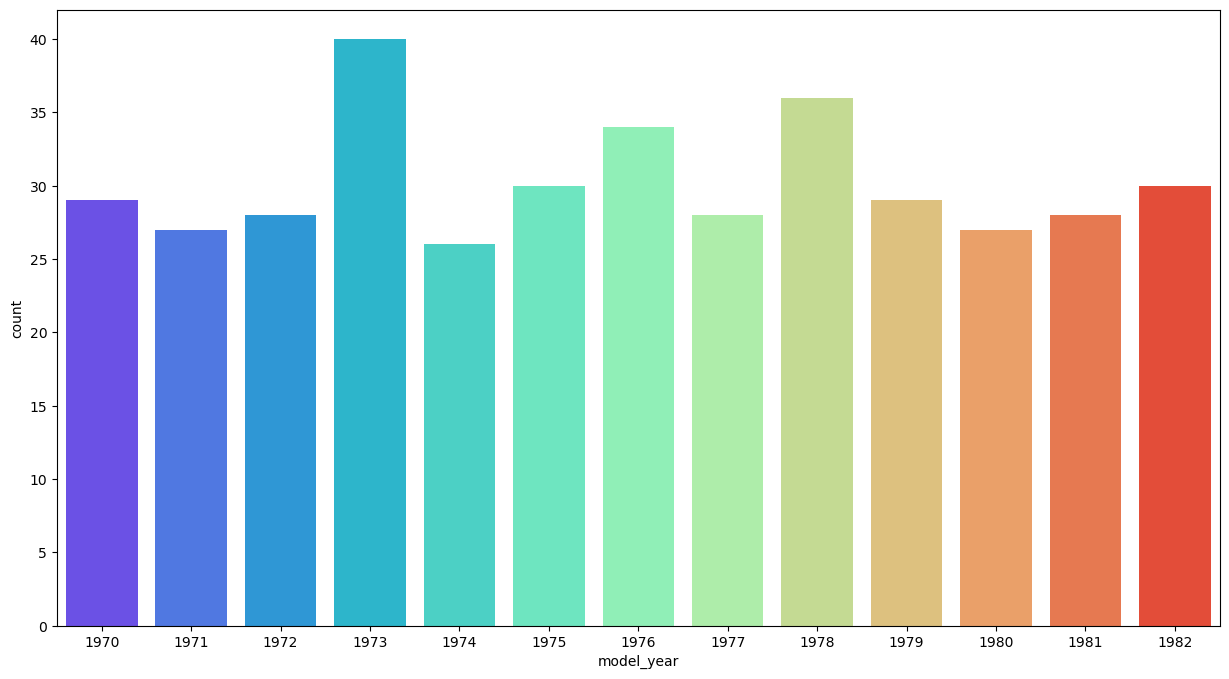

In [182]:
plt.figure(figsize = (15, 8))
sns.countplot(x=df["model_year"], data = df, palette = "rainbow")
plt.show()

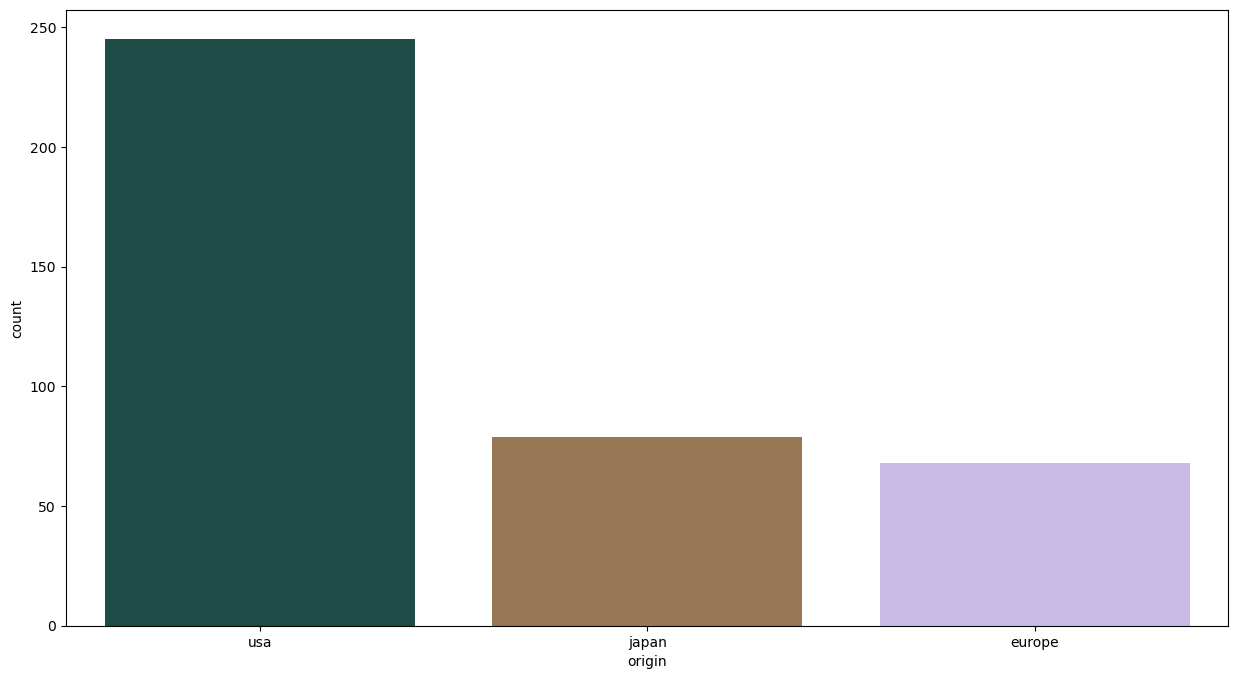

In [183]:
plt.figure(figsize = (15, 8))
sns.countplot(x=df["origin"], data = df, palette = "cubehelix")
plt.show()

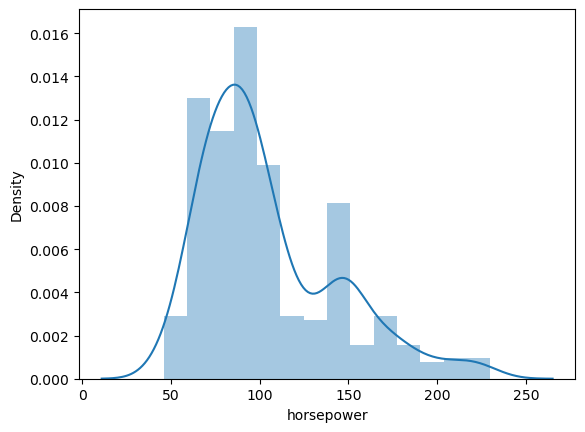

In [184]:
sns.distplot(df["horsepower"])
plt.show()

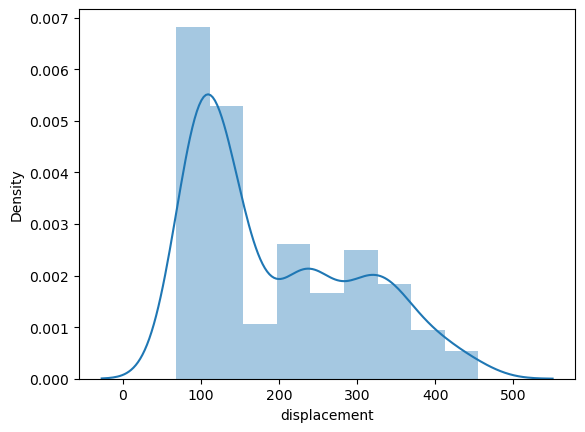

In [185]:
sns.distplot(df["displacement"])
plt.show()

**bivariate analysis**

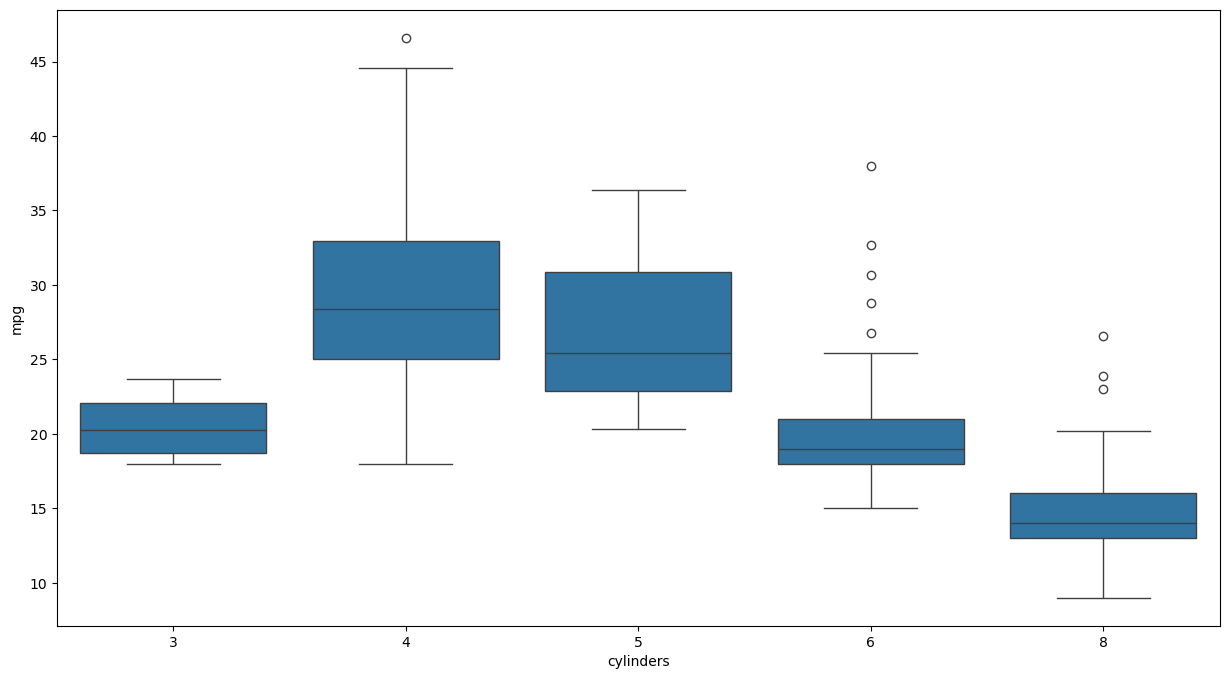

In [187]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["cylinders"],y=df["mpg"],data=df )
plt.show()

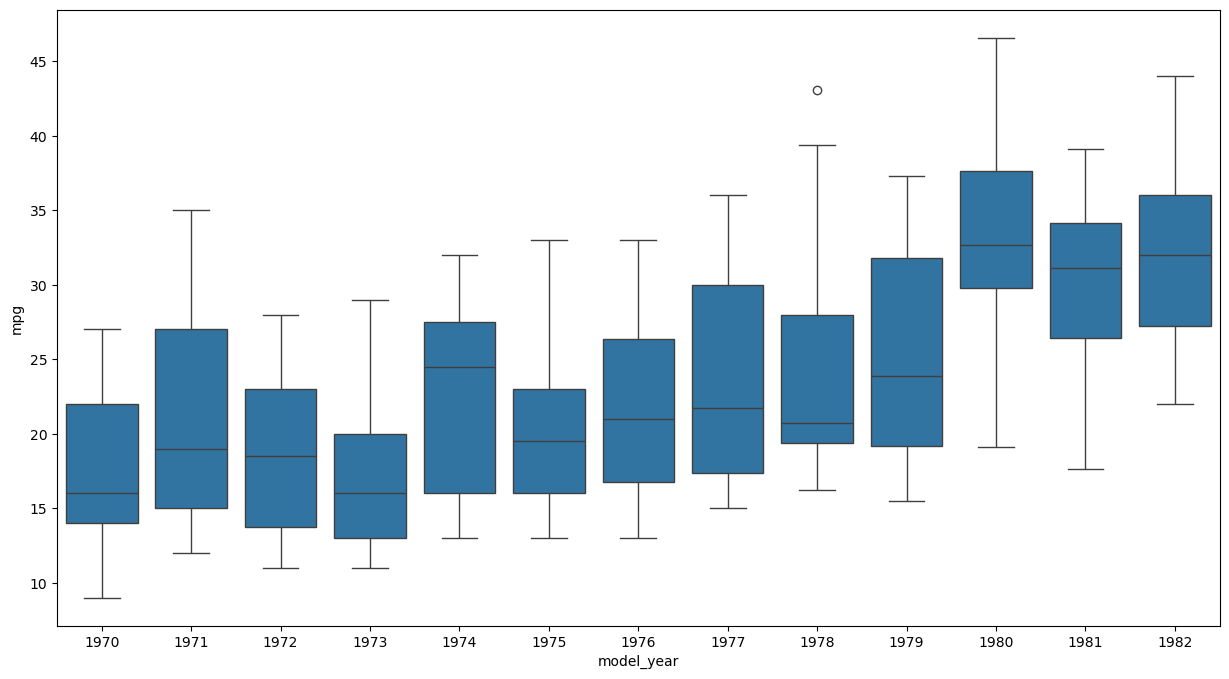

In [188]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df["model_year"],y=df["mpg"],data=df )
plt.show()

**multivaried analysis**

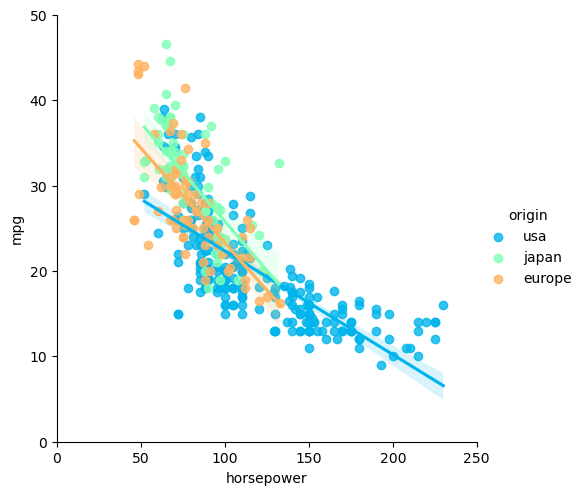

In [190]:
graph=sns.lmplot(x="horsepower",y="mpg",hue="origin",data=df,palette="rainbow")
graph.set(xlim=(0,250))
graph.set(ylim=(0,50))
plt.show()

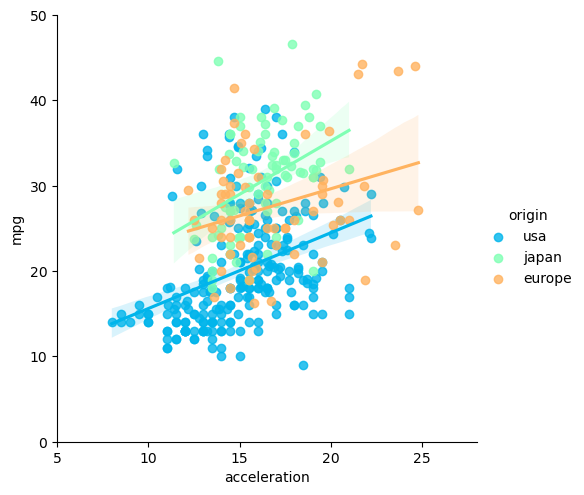

In [191]:
graph=sns.lmplot(x="acceleration",y="mpg",hue="origin",data=df,palette="rainbow")
graph.set(xlim=(5,28))
graph.set(ylim=(0,50))
plt.show()

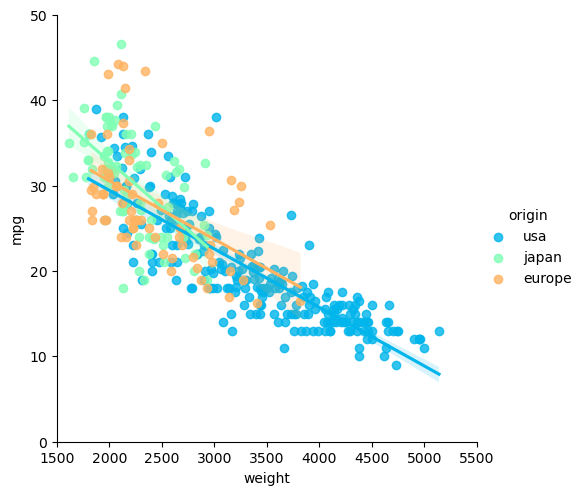

In [192]:
graph=sns.lmplot(x="weight",y="mpg",hue="origin",data=df,palette="rainbow")
graph.set(xlim=(1500,5500))
graph.set(ylim=(0,50))
plt.show()

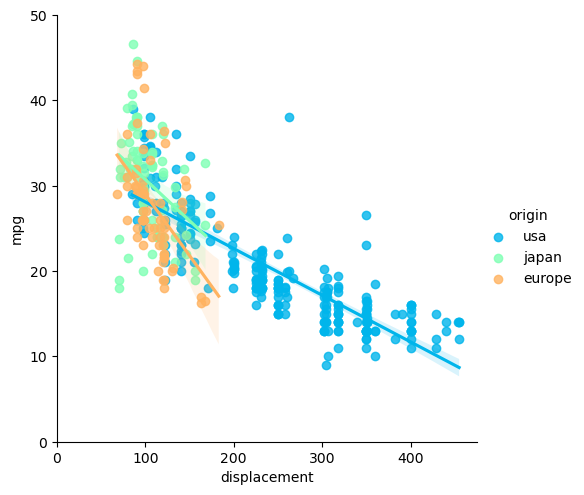

In [193]:
graph=sns.lmplot(x="displacement",y="mpg",hue="origin",data=df,palette="rainbow")
graph.set(xlim=(0,475))
graph.set(ylim=(0,50))
plt.show()

**heatmap of correlation matrix**


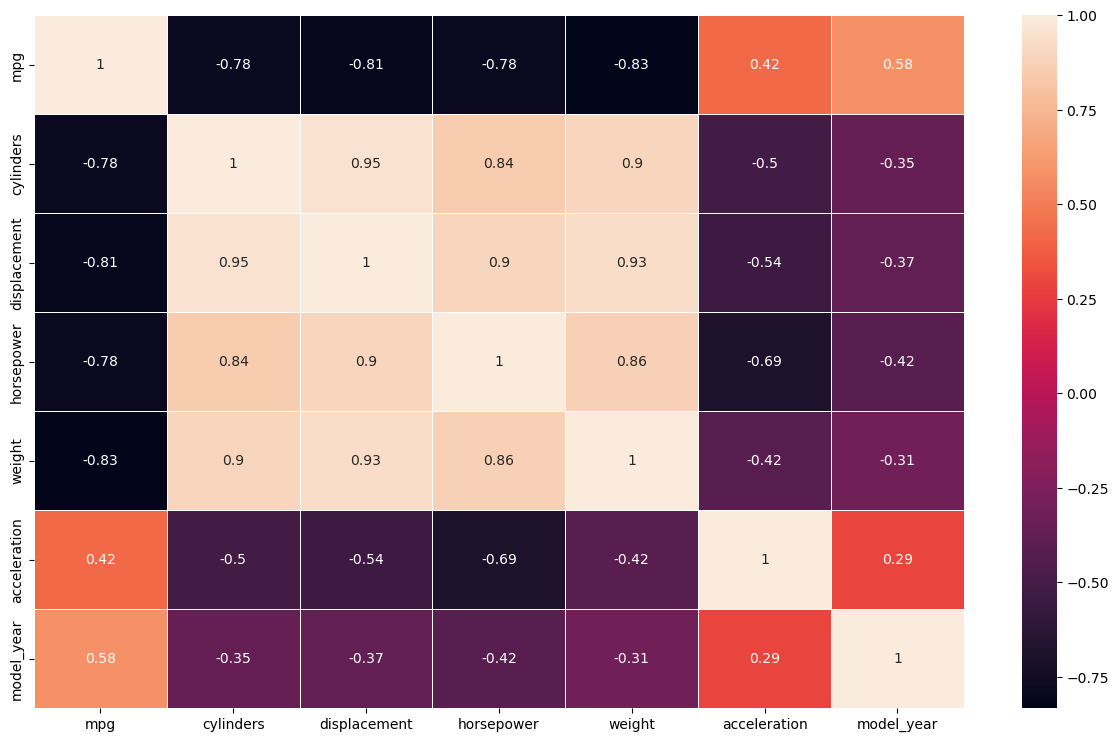

In [195]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidth=0.5)
plt.show()

In [196]:
df.drop(["acceleration","displacement"],axis=1,inplace=True)

In [197]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [198]:
from datetime import datetime

In [199]:
today=datetime.today()

In [200]:
today

datetime.datetime(2024, 11, 29, 11, 21, 56, 721035)

In [201]:
year=today.year
year

2024

In [202]:
df["age"]=year-df["model_year"]

In [203]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin,age
0,18.0,8,130.0,3504,1970,usa,54
1,15.0,8,165.0,3693,1970,usa,54
2,18.0,8,150.0,3436,1970,usa,54
3,16.0,8,150.0,3433,1970,usa,54
4,17.0,8,140.0,3449,1970,usa,54


In [204]:
df.drop(["model_year"],axis=1,inplace=True)

In [205]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,54
1,15.0,8,165.0,3693,usa,54
2,18.0,8,150.0,3436,usa,54
3,16.0,8,150.0,3433,usa,54
4,17.0,8,140.0,3449,usa,54


In [206]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [207]:
df = pd.get_dummies(df,drop_first=True)

In [208]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,False,True
1,15.0,8,165.0,3693,54,False,True
2,18.0,8,150.0,3436,54,False,True
3,16.0,8,150.0,3433,54,False,True
4,17.0,8,140.0,3449,54,False,True


**MODELLING**

In [210]:
x = df.drop(["mpg"],axis=1)
y = df["mpg"]

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [213]:
x_train

,cylinders,horsepower,weight,age,origin_japan,origin_usa
260,6,110.0,3620,46,False,True
184,4,92.0,2572,48,False,True
174,6,97.0,2984,49,False,True
64,8,150.0,4135,52,False,True
344,4,64.0,1875,43,False,True
...,...,...,...,...,...,...
72,8,150.0,3892,52,False,True
107,6,100.0,2789,51,False,True
272,4,85.0,2855,46,False,True
352,4,65.0,2380,43,False,True


In [214]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

In [215]:
from sklearn.linear_model import LinearRegression

In [216]:
lm_model=LinearRegression()

In [217]:
lm_model.fit(x_train,y_train)

LinearRegression()

In [218]:
lm_model.intercept_

79.80442103966978

In [219]:
coef_param=pd.DataFrame(lm_model.coef_,index=x.columns)

In [220]:
coef_param

,0
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


In [221]:
y_pred = lm_model.predict(x_test)

In [222]:
my_dict={"actual":y_test,"predicted":y_pred}
compare=pd.DataFrame(my_dict)
compare.sample(10)

,actual,predicted
56,26.0,24.706647
183,25.0,29.317483
109,21.0,23.683072
349,34.1,35.149008
22,25.0,23.552078
165,20.0,20.819971
169,20.0,22.314063
40,14.0,11.747138
157,15.0,13.341425
194,22.5,22.255749


In [223]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [229]:
def evaluationmetrics(actual,pred):
    mae=mean_absolute_error(actual,pred)
    mse=mean_squared_error(actual,pred)
    rmse=np.sqrt(mean_squared_error(actual,pred))
    r2=r2_score(actual,pred)
    return print("r2score: ",r2,"\n","rmse: ",rmse,"\n","mse: ",mse,"\n","mae: ",mae,"\n")

In [231]:
evaluationmetrics(y_test,y_pred)

r2score:  0.7798249880881915 
 rmse:  3.3522919059686647 
 mse:  11.237861022823022 
 mae:  2.5188281576150855 



In [233]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/282.6 kB 252.2 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 327.7 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 473.7 kB/s eta 0:00:01
   ------------------------ ------------- 184.3/282.6 kB 506.0 kB/s eta 0:00:01
   ------------------------------ ------- 225.3/282.6 kB 599.0 kB/s eta 0:00:01
   -------------------------------------  276.5/282.6 kB 609.2 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 601.2 kB/s eta 0:

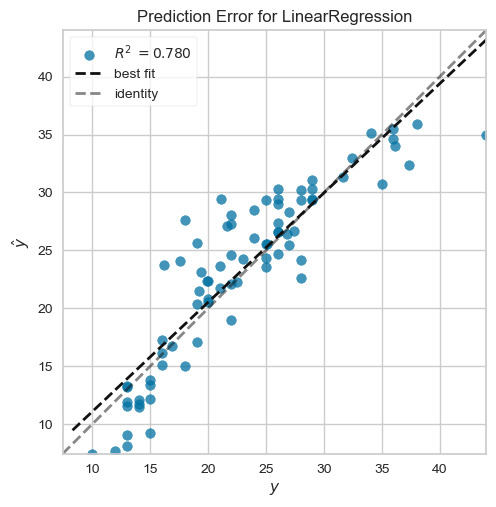

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [235]:
from yellowbrick.regressor import PredictionError
visualiser= PredictionError(lm_model)
visualiser.fit(x_train,y_train)
visualiser.score(x_test,y_test)
visualiser.show()

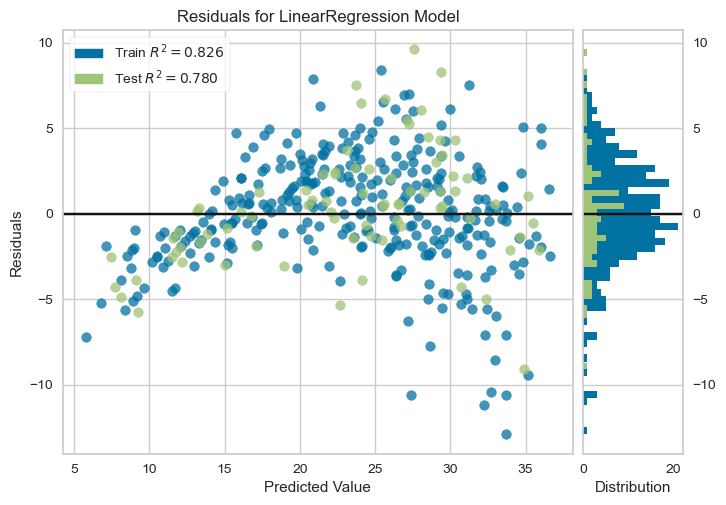

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [237]:
from yellowbrick.regressor import ResidualsPlot
visualiser= ResidualsPlot(lm_model)
visualiser.fit(x_train,y_train)
visualiser.score(x_test,y_test)
visualiser.show()